# Exploring ConWhAt Atlases

There are four different atlas types in ConWhat, corresponding to the 2 ontology types (Tract-based / Connectivity-Based) and 2 representation types (Volumetric / Streamlinetric). 

(More on this schema [here](http://conwhat.readthedocs.io/en/latest/about_conwhat/ontology_and_representation.html))

In [1]:
# ConWhAt stuff
from conwhat import VolConnAtlas,StreamConnAtlas,VolTractAtlas,StreamTractAtlas
from conwhat.viz.volume import plot_vol_scatter,plot_vol_and_rois_nilearn

# Neuroimaging stuff
import nibabel as nib
from nilearn.plotting import plot_stat_map,plot_surf_roi

# Viz stuff
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# Generic stuff
import glob, numpy as np, pandas as pd, networkx as nx

We'll start with the scale 33 lausanne 2008 volumetric connectivity-based atlas.

Define the atlas name and top-level directory location

In [2]:
atlas_dir = '/scratch/hpc3230/Data/conwhat_atlases'
atlas_name = 'CWL2k8Sc33Vol3d100s_v01'

Initialize the atlas class

In [3]:
vca = VolConnAtlas(atlas_dir=atlas_dir + '/' + atlas_name,
                   atlas_name=atlas_name)

loading file mapping
loading vol bbox
loading connectivity


This atlas object contains various pieces of general information

In [4]:
vca.atlas_name

'CWL2k8Sc33Vol3d100s_v01'

In [5]:
vca.atlas_dir

'/scratch/hpc3230/Data/conwhat_atlases/CWL2k8Sc33Vol3d100s_v01'

Information about each atlas entry is contained in the `vfms` attribute, which returns a pandas dataframe

In [14]:
vca.vfms.head()

,name,nii_file,nii_file_id,4dvolind
0,61_to_80,vismap_grp_62-81_norm.nii.gz,0,NaN
1,38_to_55,vismap_grp_39-56_norm.nii.gz,1,NaN
2,28_to_38,vismap_grp_29-39_norm.nii.gz,2,NaN
3,18_to_19,vismap_grp_19-20_norm.nii.gz,3,NaN
4,26_to_55,vismap_grp_27-56_norm.nii.gz,4,NaN


Additionally, connectivity-based atlases also contain a `networkx` graph object `vca.Gnx`, 
which contains information about each connectome edge

In [62]:
vca.Gnx.edges[(10,35)]

{'attr_dict': {'4dvolind': nan,
  'fullname': 'L_paracentral_to_L_caudate',
  'idx': 1637,
  'name': '10_to_35',
  'nii_file': 'vismap_grp_11-36_norm.nii.gz',
  'nii_file_id': 1637,
  'weight': 50.240000000000002,
  'xmax': 92,
  'xmin': 61,
  'ymax': 167,
  'ymin': 75,
  'zmax': 92,
  'zmin': 62}}

Individual atlas entry nifti images can be grabbed like so

In [144]:
img = vca.get_vol_from_vfm(1637)

getting atlas entry 1637: image file /scratch/hpc3230/Data/conwhat_atlases/CWL2k8Sc33Vol3d100s_v01/vismap_grp_11-36_norm.nii.gz


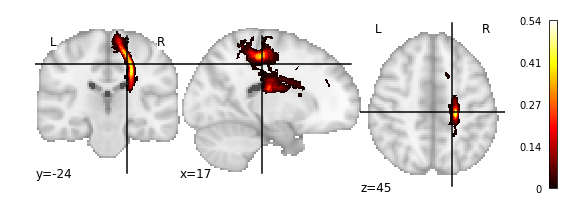

In [146]:
plot_stat_map(img)

Or alternatively as a 3D scatter plot, along with the x,y,z bounding box

In [155]:
vca.bbox.ix[1637]

xmin     61
xmax     92
ymin     75
ymax    167
zmin     62
zmax     92
Name: 1637, dtype: int64

getting atlas entry 1: image file /scratch/hpc3230/Data/conwhat_atlases/CWL2k8Sc33Vol3d100s_v01/vismap_grp_39-56_norm.nii.gz


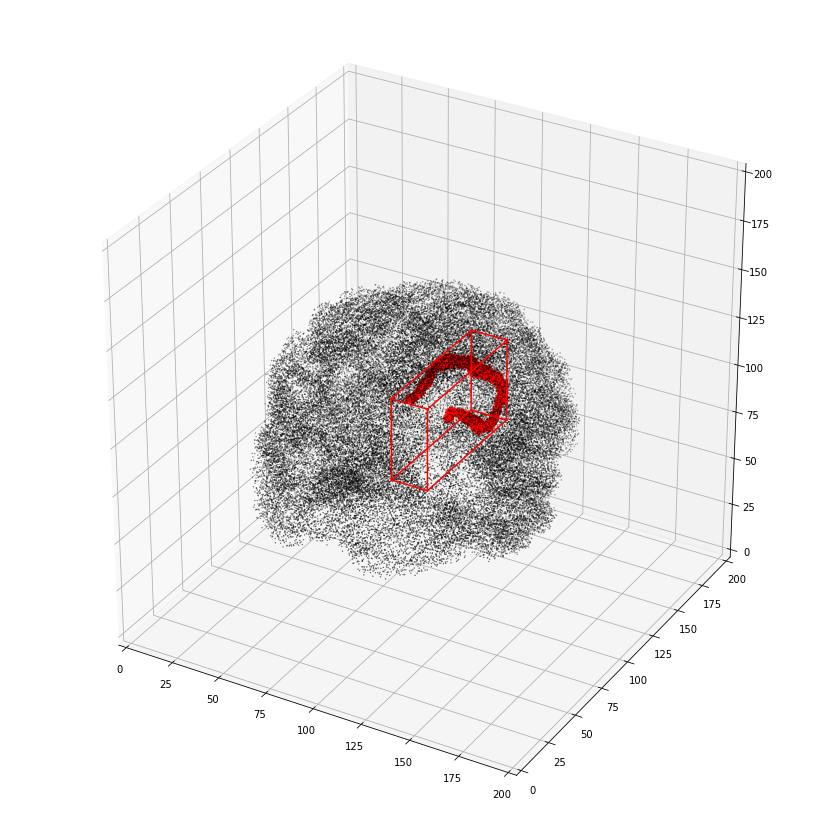

In [134]:
ax = plot_vol_scatter(vca.get_vol_from_vfm(1),c='r',bg_img='nilearn_destrieux',
                      bg_params={'s': 0.1, 'c':'k'},figsize=(20, 15))

ax.set_xlim([0,200]); ax.set_ylim([0,200]); ax.set_zlim([0,200]);

In [ ]:
# TO TIDY UP
roi1 = 10
roi2 = 35
labels_file = '/home/jgriffiths/Code/libraries_of_mine/github/ConWhAt/conwhat/data/CW_l2k8sc33/ROI_scale33.nii.gz'
plot_vol_and_rois_nilearn(vca.get_vol_from_rois(roi1,roi2),
                          labels=labels_file,roi1=roi1+1,roi2=roi2+1)

In [ ]:
# TO ADD AND TIDY UP 
%matplotlib nbagg
jhu_test_file = '../conwhat/scratch/lesion_test_file_from_jhu.nii.gz'
jhu_vta = VolTractAtlas('JHU')

ax = plot_vol_scatter(jhu_vta.get_vol_from_vfm(1),c='b',bg_img='nilearn_destrieux')
plot_vol_scatter(jhu_vta.get_vol_from_vfm(1),ax=ax,c='r')
plot_vol_scatter(jhu_vta.get_vol_from_vfm(2),ax=ax,c='cyan')

plot_vol_scatter(jhu_vta.get_vol_from_vfm(2),ax=ax,c='cyan')

plot_vol_scatter(jhu_test_file,ax=ax, c='k')

We can also view the weights matrix like so:

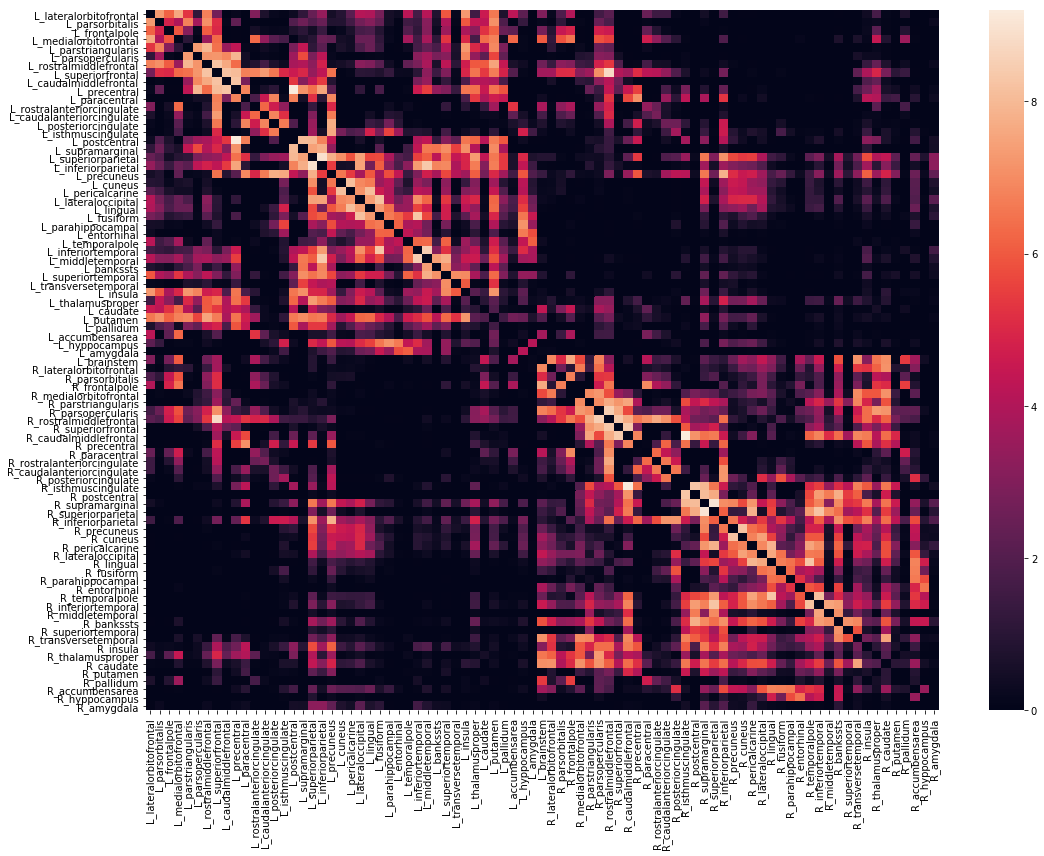

In [38]:
fig, ax = plt.subplots(figsize=(16,12))

sns.heatmap(np.log1p(vca.weights),xticklabels=vca.region_labels,
            yticklabels=vca.region_labels,ax=ax);
plt.tight_layout()

The `vca` object also contains x,y,z bounding boxes for each structure

We also stored additional useful information about the ROIs in the associated parcellation, including cortical/subcortical labels

In [156]:
vca.cortex

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

...hemisphere labels

In [157]:
vca.hemispheres

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

...and region mappings to freesurfer's fsaverage brain

In [158]:
vca.region_mapping_fsav_lh

array([ 24.,  29.,  28., ...,  16.,   7.,   7.])

In [159]:
vca.region_mapping_fsav_rh

array([ 24.,  29.,  22., ...,   9.,   9.,   9.])

which can be used for, e.g. plotting ROI data on a surface

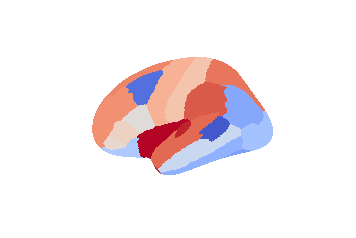

In [167]:
f = '/opt/freesurfer/freesurfer/subjects/fsaverage/surf/lh.inflated'
vtx,tri = nib.freesurfer.read_geometry(f)
plot_surf_roi([vtx,tri],vca.region_mapping_fsav_lh);

---

getting atlas entry 1637: image file /scratch/hpc3230/Data/conwhat_atlases/CWL2k8Sc33Vol3d100s_v01/vismap_grp_11-36_norm.nii.gz


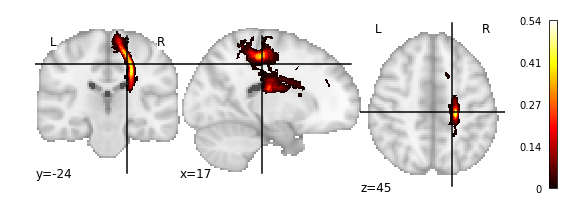

In [6]:
img = vca.get_vol_from_vfm(1637)
plot_stat_map(img)

getting atlas entry 1000: image file /scratch/hpc3230/Data/conwhat_atlases/CWL2k8Sc33Vol3d100s_v01/vismap_grp_48-72_norm.nii.gz


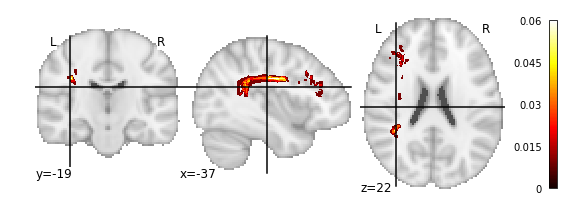

In [13]:
img = vca.get_vol_from_vfm(1000)
plot_stat_map(img)

In [16]:
img = vca.get_vol_from_vfm(500)

getting atlas entry 500: image file /scratch/hpc3230/Data/conwhat_atlases/CWL2k8Sc33Vol3d100s_v01/vismap_grp_10-30_norm.nii.gz


In [28]:
(img.get_data()>0).sum()sdddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddd

57927

In [25]:
len(np.nonzero(img.get_data()>0)[0])

57927